# Group Information

*   Animesh Raj : 11940120
*   Puja Bansal : 11940910


---
DS250 1C Assignment

# Initilalizing Libraries

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree
import math
from decimal import Decimal
import seaborn as sns

# Dataset Import

**Kaggle Dataset Import**

In [2]:
#! pip install -q kaggle
#from google.colab import files
#files.upload()
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

In [3]:
#! kaggle datasets download -d itachi9604/disease-symptom-description-dataset

In [4]:
#! unzip disease-symptom-description-dataset.zip

# Data Prepossesing

**Importing dataset.csv file**

In [5]:
df = pd.read_csv('dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


**Remove the white space from all the columns**

In [7]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Replace all NaN values with 0**

In [8]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Working on prepossessed data

**Creating list of symptoms for each row**

In [9]:
# creating arrays of symptoms in symptom attribute column
records_length = df['Disease']
df['Symptoms'] = 0

# extracting all column values from each row (throwing away null values)
for i in range(len(records_length)):
    symptom_row_list = df.iloc[i].values
    symptom_row_list = symptom_row_list.tolist()
    if 0 in symptom_row_list:
      df["Symptoms"][i] = symptom_row_list[1:symptom_row_list.index(0)]
    else:
      df["Symptoms"][i] = symptom_row_list[1:]
df.head()

C:\Users\PUJABA~1\AppData\Local\Temp/ipykernel_21396/2709426585.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Symptoms"][i] = symptom_row_list[1:symptom_row_list.index(0)]


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Symptoms
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, nodal_skin_eruptions, dis..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[skin_rash, nodal_skin_eruptions, dischromic _..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, nodal_skin_eruptions, dischromic _pa..."
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, dischromic _patches]"
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, nodal_skin_eruptions]"


**Importing Symptom-severity.csv file**

In [10]:
df1 = pd.read_csv('Symptom-severity.csv')
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [11]:
# obtaining array of unique symptoms from Symptom-severity dataset
symptoms_unique = df1['Symptom'].unique()
symptoms_unique
#len(df1['Symptom'])

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [12]:
len(symptoms_unique)

132

**Creating binary attribute for symptoms table**

In [13]:
# creating an empty table intializing all values to 0
symptoms_table = pd.DataFrame(columns = symptoms_unique,index = df.index)
symptoms_table = symptoms_table.fillna(0)
symptoms_table.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# comparing symptoms table with dataset.csv
symptoms_table["Symptoms"] = df["Symptoms"]
for i in symptoms_unique:
    symptoms_table[i] = symptoms_table.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)

C:\Users\PUJABA~1\AppData\Local\Temp/ipykernel_21396/851763033.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  symptoms_table["Symptoms"] = df["Symptoms"]


In [15]:
# binary attribute for symptoms table
symptoms_table["Disease"] = df["Disease"]
symptoms = symptoms_table.drop("Symptoms",axis=1)
symptoms.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Disease
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


**Training and Testing Model**

In [16]:
# testing and training of model
train, test = train_test_split(symptoms,test_size=0.2)
x_train = train.drop("Disease",axis=1)
y_train = train["Disease"].copy()
x_test = test.drop("Disease",axis=1)
y_test = test["Disease"].copy()

In [17]:
class DecisionTree:
    
    def __init__(self, max_depth=None):
        self.nodes = {}
        self.parentNode = 1
        self.leafNode = {}
        self.leafProbability = {}
        self.y_train = None
        self.b = None
        if max_depth is None:
          self.max_depth = np.inf
        else:
          self.max_depth = max_depth
    
    def fit(self, x_train, y_train, depth=0):
        self.parentNode = 1
        self.y_train = y_train
        self.b = len(np.unique(y_train))
        self.unique_labels = np.unique(y_train)
        self.dTree(self.parentNode, depth, x_train, y_train)
    
    def entropyCal(self, y):
         
        # number of labels      
        unique_labels = self.unique_labels
        n = self.b
        
        if len(y) == 0:
          return 0

        if n == 1:
            return 0
        
        e = 0
        for i in range(n):
            label = unique_labels[i]
            cnt = 0
            for i in y:
              if i == label:
                cnt += 1
            prob = cnt / len(y)
            if prob == 0:
              e += 0
            else:
              e += -1 * prob * math.log(prob, n)
        
        return e
    
    def dTree(self, node, depth, x_train=None, y_train=None):
        
        # if the node is a leaf node
        if (depth >= self.max_depth):
            
            # Probability of each label
            probs = {}
            for label in y_train:
                if label not in probs:
                    probs[label] = 0
                probs[label] += 1
            # Normalize
            for label in probs:
                probs[label] /= len(y_train)
            
            # Label with highest probability
            max_prob = 0
            max_label = None
            for label in probs:
                if probs[label] > max_prob:
                    max_prob = probs[label]
                    max_label = label
            
            self.leafNode[node] = max_label
            self.leafProbability[node] = probs
            
            return        
        
        if  len(np.unique(y_train)) == 1:
          
            # Probability of each label
            probs = {}
            for label in y_train:
                if label not in probs:
                    probs[label] = 0
                probs[label] += 1
            # Normalize
            for label in probs:
                probs[label] /= len(y_train)
            
            # Label with highest probability
            max_prob = 0
            max_label = None
            for label in probs:
                if probs[label] > max_prob:
                    max_prob = probs[label]
                    max_label = label
            
            self.leafNode[node] = max_label
            self.leafProbability[node] = probs
            
            return                  

        max_information_gain = -np.inf
        max_information_gain_index = -1
        dsLeft_x = []
        dsLeft_y = []
        dsRight_x = []
        dsRight_y = []
        
        if len(y_train) == 0:
            return
        
        number_of_possible_splits = len(x_train[0])
        
        for i in range(number_of_possible_splits):
             
            ds1_x = []
            ds1_y = []
            ds2_x = []
            ds2_y = []
            
            for j in range(len(x_train)):
                if x_train[j][i] == 1:
                    ds1_x.append(x_train[j])
                    ds1_y.append(y_train[j])
                else:
                    ds2_x.append(x_train[j])
                    ds2_y.append(y_train[j])
            
            # entropy of the current node
            current_entropy = self.entropyCal(y_train)
            
            # entropy of the left node
            left_entropy = self.entropyCal(ds1_y)
            
            # entropy of the right node
            right_entropy = self.entropyCal(ds2_y)
            
            # information gain
            ig = current_entropy - (len(ds1_y) / len(y_train)) * left_entropy - (len(ds2_y) / len(y_train)) * right_entropy
            
            # if information gain is greater than the previous one, update the max_information_gain and max_information_gain_index
            if ig > max_information_gain:
                max_information_gain = ig
                max_information_gain_index = i
                dsLeft_x = ds1_x
                dsLeft_y = ds1_y
                dsRight_x = ds2_x
                dsRight_y = ds2_y
            

        if max_information_gain_index == -1:
            return

        self.nodes[node] = max_information_gain_index

        # create the left node
        left_node = node * 2
        self.dTree(left_node, depth+1, dsLeft_x, dsLeft_y)
        
        # create the right node
        right_node = node * 2 + 1
        self.dTree(right_node, depth+1, dsRight_x, dsRight_y)
            
        return
    
    def predict(self, x_test):
        
        y_pred = []
         
        for i in range(len(x_test)):
            y_pred.append(self.predictLabel(x_test[i]))
        
        return y_pred

    def predictLabel(self, x_test):
            
            node = 1
            
            # traverse the tree
            while node not in self.leafNode:

                if x_test[self.nodes[node]] == 1:
                    node = node * 2
                else:
                    node = node * 2 + 1
            
            # return the label
            return self.leafNode[node]
        
    
    def predictProbability(self, x_test):
            
            y_pred = []
            
            for i in range(len(x_test)):
                y_pred.append(self.predictProbabilityLabel(x_test[i]))
            
            return y_pred

    def predictProbabilityLabel(self, x_test):
            
            node = 1
            
            # traverse the tree
            while node not in self.leafProbability:
                if x_test[self.nodes[node]] == 1:
                    node = node * 2
                else:
                    node = node * 2 + 1
            
            # return the probabilities
            return self.leafProbability[node]


In [18]:
# DT Classifier

#dt = DecisionTree()  #for whole decision tree
dt = DecisionTree(max_depth = 7)   # when max depth is 5


dt.fit(x_train.values, y_train.values)
# prediction of labels for the test data
dt_pred = dt.predict(x_test.values)

**Confusion Matrix**

In [19]:
result = confusion_matrix(y_test.values, dt_pred)
print('Confusion Matrix : \n', result)
print('\nAccuracy =', accuracy_score(y_test.values, dt_pred)*100,'%')
print('Precision =', precision_score(y_test.values, dt_pred, average="macro")*100,'%')
print('Recall =', recall_score(y_test.values, dt_pred, average="macro")*100,'%')    
print('F1-score =', f1_score(y_test.values, dt_pred, average='macro')*100,'%')

Confusion Matrix : 
 [[20  0  0 ...  0  0  0]
 [ 0 26  0 ...  1  0  0]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 0  0  0 ... 25  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  0  0 ...  1  0 28]]

Accuracy = 85.77235772357723 %
Precision = 88.47537967212017 %
Recall = 87.17248615481641 %
F1-score = 86.71852830234498 %


C:\Users\Puja Bansal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
matrix = classification_report(dt_pred, y_test)
print('Classification report : \n',matrix)

Classification report : 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.77      1.00      0.87        20
                                   AIDS       0.96      0.96      0.96        27
                                   Acne       0.83      1.00      0.91        29
                    Alcoholic hepatitis       0.88      1.00      0.94        23
                                Allergy       0.00      0.00      0.00         0
                              Arthritis       0.90      1.00      0.95        18
                       Bronchial Asthma       0.84      0.93      0.88        28
                   Cervical spondylosis       0.82      0.82      0.82        28
                            Chicken pox       0.87      1.00      0.93        13
                    Chronic cholestasis       0.91      0.84      0.87        25
                            Common Cold       0.96      1.00      0.98        22
 

C:\Users\Puja Bansal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Puja Bansal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Puja Bansal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

# Plots

**Heat Map plot**

<AxesSubplot:>

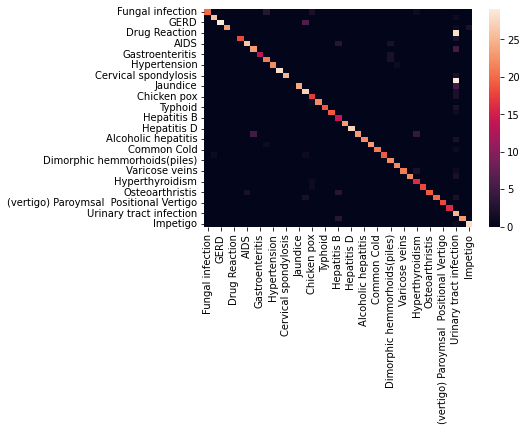

In [21]:
df_cm = pd.DataFrame(result, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)

In [22]:
import pickle
pickle.dump(symptoms_table , open('symptoms_table.pkl', 'wb'))
pickle.dump(dt , open('model.pkl', 'wb'))

Streamlit Working

In [23]:
! streamlit run script.py

^C
